## ISYE 6740 - Assignment 3 - Clustering

#### As we explore exciting new developments in AI, I want to provide some guidance around using chatbots like ChatGPT for our class assignments. 

#### The assignments are intended to develop your own skills and understanding. I encourage you to use ChatGPT liberally as a learning tool - discussing prompts and solutions with it can provide valuable insight into the problems. While ChatGPT can assist, make sure you are deeply engaged in working through the problems yourself. Take time to carefully review any suggestions from ChatGPT before submitting, and feel free to email me any prompts you find helpful. 

#### While directly copying ChatGPT solutions into assignments is not prohibited, I advise using discretion and care when relying on its outputs. The goal is to leverage this technology to enhance your learning, but not replace the thinking required, as I believe you do not want to regret being unable to answer machine learning questions well in a job interview.

### Please leave the name of your teammate here if applicable.

In [ ]:
### Insert Name Here
# Wenxin Jiang
# Yihan Liao

Run the following block to hide all the output warnings:

In [1]:
import warnings
warnings.filterwarnings('ignore')

### Q1) K-means

* For this question, the dataset used for training is collected from three different Gaussian distributions. Each data point is in $\mathrm{R}^2$. We will use this dataset to study k-means clustering.

* Recall that the goal of k-means is to learn a partition of clusters $\{ \hat{S}_1, \hat{S}_2, \ldots, \hat{S}_k \}$ and the center $\hat{\mu}_i$ for each partition $\hat{S}_i$ such that the the sum of within cluster sum of square distance to the center is minimized, i.e.
\begin{equation}\label{eq}
(\hat{S}_1, \ldots, \hat{S}_k,\hat{\mu}_1, \ldots, \hat{\mu}_k) = \text{argmin}_{S_1, \ldots, S_k,\mu_1, \ldots, \mu_k} \sum_{i=1}^k \sum_{j \in S_i}\| \mu_i - x_j\|_2^2.
\end{equation}

* Please refer to the following package for K-means:\
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

#### a) Plot and color all data points of the provided dataset by the ground truth labels.

In [1]:
# Insert Code Here

#### b) Apply the k-means method to the dataset, and compute the objective value of the output (the sum of within cluster sum of square distance to the center) using k=1,2,3,4,5,6. Then plot objective value vs. k. What do you observe?

In [2]:
# Insert Code Here

#### c) Plot and color all data points by the clustering results for k=1,2,3,4,5,6. How do these plots compare to that under the ground truth labels?

In [3]:
# Insert Code Here

#### d) Calucluate the clustering accuracy of the k-means method with k=3 based on the ground truth labels. You may choose any approach that you find appropriate.

In [4]:
# Insert Code Here

### Q2) Hierarchical Clustering

* In this question, we use NCI cancer cell line microarray data to study hierarchical clustering. The dataset contains expression levels on 6830 genes from 64 cancer cell lines as well as cancer types. 'Question2_features.csv' records a 64 by 6830 matrix of the expression values while 'Question2_labels.csv' is a vector listing the cancer types for the 64 cell lines.

* The linkage( ) function from scipy implements several clustering functions in python. Please refer to the following package for linkage:\
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html 
* To plot the hierarchical clustering as a dendrogram, please refer to the following package for dendrogram:\
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram

* The cut_tree( ) function cuts the dendrogram at certain height that will yields a particular number of clusters. Please refer to the following package for cut_tree:\
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.cut_tree.html#scipy.cluster.hierarchy.cut_tree

#### a) Perform hierarchical clustering of data using 'complete', 'single', and 'average' linkage clustering, with Euclidean distance as the dissimilarity measure.

In [5]:
# Insert Code Here

#### b) Plot the dendrograms of different linkage clustering obtained in a). Let the labels of the x-axis be cancer types. What do you observe?

In [6]:
# Insert Code Here

####  c) Now let's use our 'complete' linkage hierarchical clustering for the analysis. Cut the dendrogram of complete linkage hierarchical clustering at the height that will yield 4 clusters. Provide a table to present the count of cancer cells of the same cancer type grouped within the same cluster.

In [7]:
# Insert Code Here

#### d) Apply the k-means clustering method to the dataset with k=4. How do these NCI60 k-means clustering results compare to what we get in c)?

In [8]:
# Insert Code Here

### Q3) Gaussian Mixture Models

* For this question, the dataset used for training is collected from three different Gaussian distributions. Each data point is in $\mathrm{R}^2$. We will use this dataset to study Gaussian mixture models.

* Please refer to the following package for Gaussian mixture models:\
https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

#### a) Learn Gaussian mixture models with k=1,2,3,4,5 clusters using the provided training dataset. Afterwards, compute the log-likelihood of the trained model based on the testing dataset. Finally, plot the log-likelihood vs. k. What do you observe? Which k will choose? Why? 

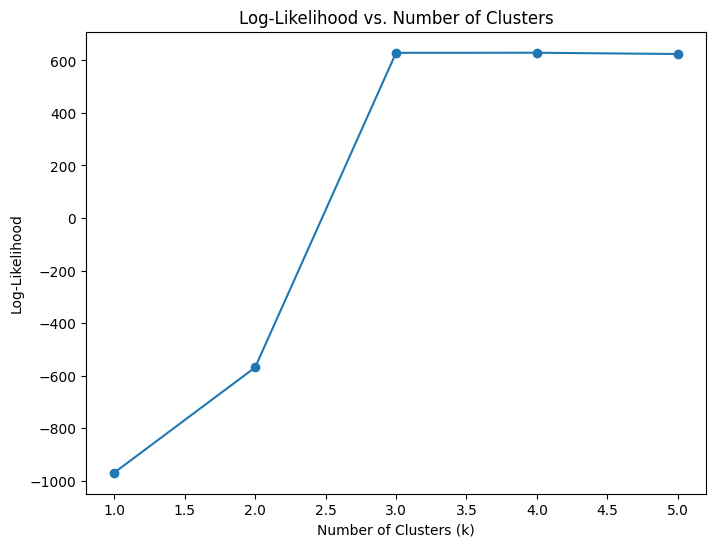

Log-Likelihood values: [-969.8829515554163, -568.9625378859353, 628.9107392766041, 629.2791430304853, 624.3562128788076]


In [2]:
# Insert Code Here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

train_data = pd.read_csv("Question3_training.csv")
test_data = pd.read_csv("Question3_testing.csv")

log_likelihoods = []

# Test different values of k
for k in range(1, 6):
    # Fit a Gaussian Mixture Model with k components
    gmm = GaussianMixture(n_components=k, random_state=0)
    gmm.fit(train_data)
    
    # Calculate the log-likelihood of the model on the test dataset
    log_likelihood = gmm.score(test_data) * test_data.shape[0]
    log_likelihoods.append(log_likelihood)

# Plotting log-likelihood vs k
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), log_likelihoods, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood vs. Number of Clusters')
plt.show()

# Observations
print("Log-Likelihood values:", log_likelihoods)
'''
From the figure, we observed that as k increases, the log-likelihood generally increases since more clusters can better fit the data. However, at a certain point, the increase in log-likelihood may diminish.

I will choose the k = 3 because we observe the highest log-likelihood with minimal additional increase. This point usually reflects the best balance between fitting the data well and avoiding overfitting.
'''

#### b) Apply the K-means method to the same training set with k=3. Then, apply the obtained centers to cluster the testing data set. Plot and color the data points in the testing set by the clustering results. 

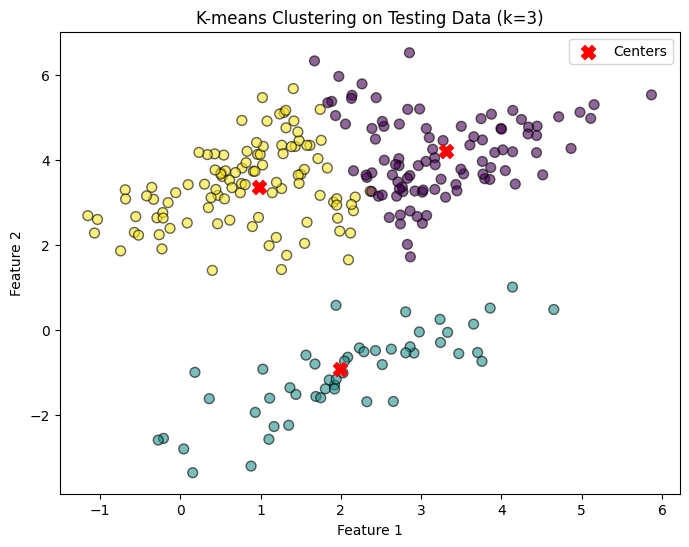

In [4]:
from sklearn.cluster import KMeans
# Convert the data to NumPy arrays if they aren’t already
train_data = train_data.values if isinstance(train_data, pd.DataFrame) else train_data
test_data = test_data.values if isinstance(test_data, pd.DataFrame) else test_data

# Step 1: Apply K-means with k=3 on the training set
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(train_data)

# Step 2: Use the trained centers to predict clusters on the testing set
test_labels = kmeans.predict(test_data)

# Step 3: Plot the testing data, coloring by cluster label
plt.figure(figsize=(8, 6))
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, cmap='viridis', marker='o', s=50, alpha=0.6, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=100, label='Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering on Testing Data (k=3)')
plt.legend()
plt.show()

#### c) Repeat the process in b) using the Gaussian mixture model for k=3 in a). What do you observe when comparing the outputs of the K-means and Gaussian mixture models? Why?

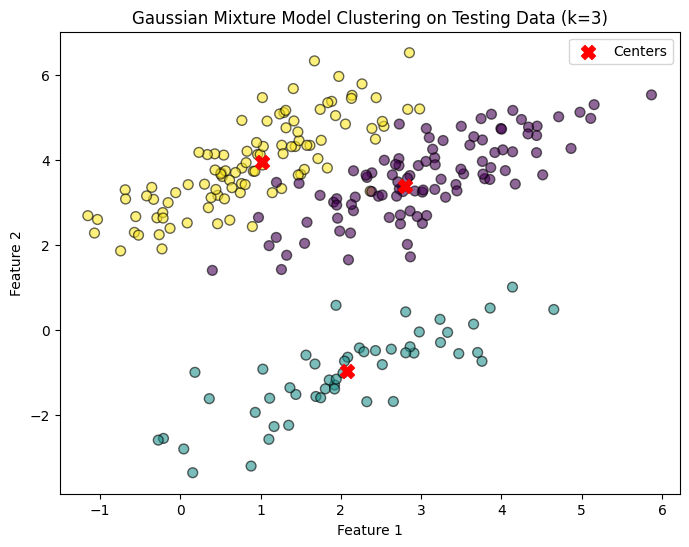

In [5]:
# Step 1: Fit a Gaussian Mixture Model with k=3 on the training set
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(train_data)

# Step 2: Predict clusters on the testing set
gmm_labels = gmm.predict(test_data)

# Step 3: Plot the testing data, coloring by GMM cluster label
plt.figure(figsize=(8, 6))
plt.scatter(test_data[:, 0], test_data[:, 1], c=gmm_labels, cmap='viridis', marker='o', s=50, alpha=0.6, edgecolor='k')
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', marker='X', s=100, label='Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gaussian Mixture Model Clustering on Testing Data (k=3)')
plt.legend()
plt.show()
"""
Shapes: The clusters formed by K-means are more circular, and the boundary are harder.
Since GMM is a probabilistic model, it provides softer boundaries, meaning data points closer to the boundary between two clusters may belong to either cluster with certain probabilities. This probabilistic approach allows for more fluid boundaries, which can capture overlapping clusters better.
"""

### Q4) Graph Clustering

* In this question, a 100 by 100 adjacency matrix of 100 nodes is given to study graph clustering method.

* Please refer to the following package for spectral clustering:\
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.spectral_clustering.html

* You can use the package networkx to build and draw graphs. To create a graph from the adjacency matrix, please refer to the following function:\
https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_numpy_array.html

* To draw network graphs, please refer to the following function draw_networkx:\
https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html

#### a) Plot 100 nodes of the given adjacency matrix, and the nodes are expected to be evenly distributed on a unit circle.

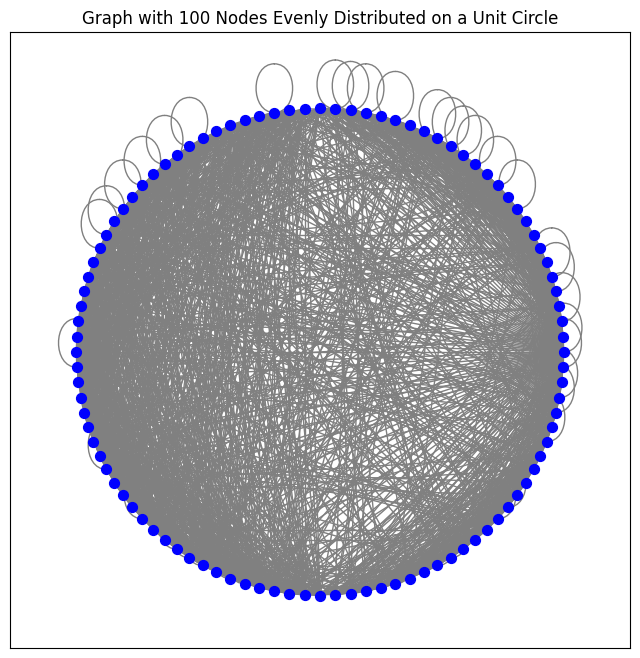

In [12]:
# Insert Code Here
import networkx as nx

# Step 1: Load the adjacency matrix
# Load only the first 100 columns to ensure a square matrix
adj_matrix = pd.read_csv("Question4.csv", usecols=range(100)).values

# Step 2: Create a graph from the adjacency matrix
G = nx.from_numpy_array(adj_matrix)

# Step 3: Position nodes evenly on a unit circle
pos = {}
num_nodes = len(G.nodes)
angle = 2 * np.pi / num_nodes  # Angle between nodes

for i in range(num_nodes):
    x = np.cos(i * angle)  # X-coordinate
    y = np.sin(i * angle)  # Y-coordinate
    pos[i] = (x, y)

# Step 4: Plot the graph with circular layout
plt.figure(figsize=(8, 8))
nx.draw_networkx(G, pos, node_size=50, node_color='blue', with_labels=False, edge_color='gray')
plt.title('Graph with 100 Nodes Evenly Distributed on a Unit Circle')
plt.axis('equal')  # Ensure the circle looks round
plt.show()

#### b) Apply the spectral clustering to the given adjacency matrix with k=2,3,4 clusters. Plot the graph using the positions from a), and color the nodes by the clustering results. 

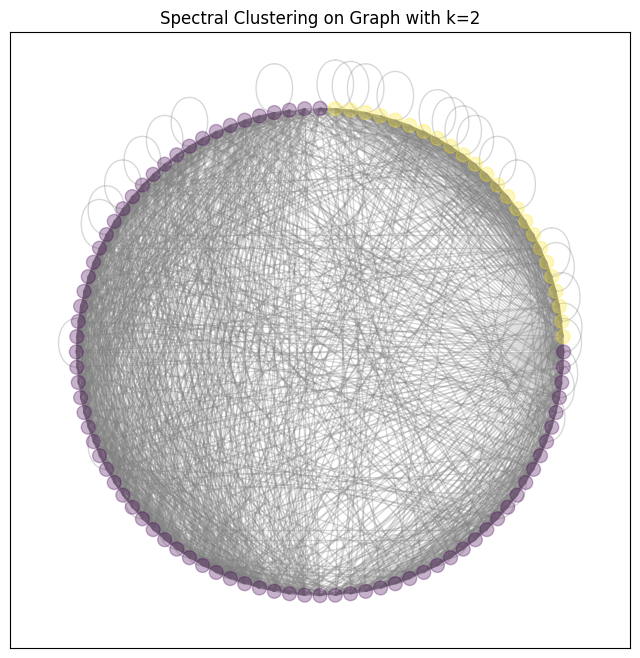

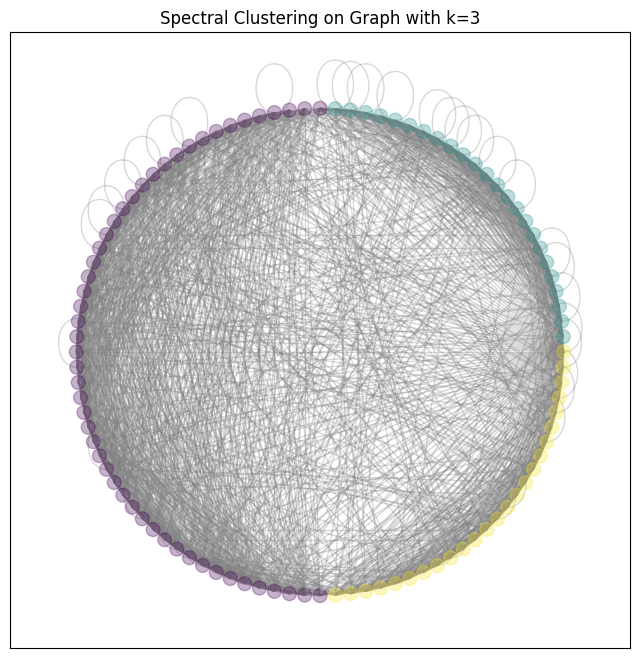

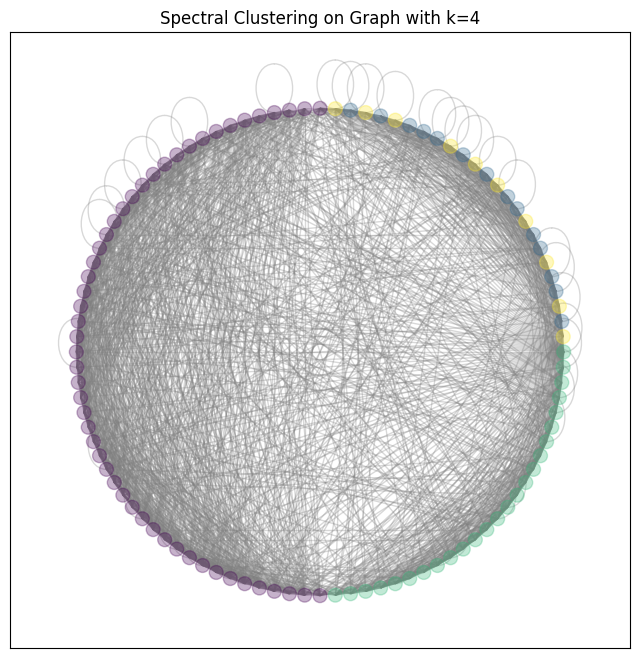

In [14]:
from sklearn.cluster import spectral_clustering

# Create a graph from the adjacency matrix
G = nx.from_numpy_array(adj_matrix)

# Set up circular layout for consistent node positions
pos = {}
num_nodes = len(G.nodes)
angle = 2 * np.pi / num_nodes

for i in range(num_nodes):
    x = np.cos(i * angle)
    y = np.sin(i * angle)
    pos[i] = (x, y)

# List of cluster counts to try
cluster_counts = [2, 3, 4]

# Apply spectral clustering for each k and plot
for k in cluster_counts:
    # Apply spectral clustering with k clusters
    labels = spectral_clustering(adj_matrix, n_clusters=k, random_state=0)
    
    # Plot the graph with nodes colored by cluster labels
    plt.figure(figsize=(8, 8))
    nx.draw_networkx(G, pos, node_color=labels, cmap='viridis', node_size=100, with_labels=False, edge_color='gray', alpha=0.3)
    plt.title(f'Spectral Clustering on Graph with k={k}')
    plt.axis('equal')
    plt.show()


#### c) Based on the clustering results in b), which k will you choose?

In [ ]:
'''
I will choose k=3. With three clusters, there is further subdivision, which may capture additional structural details within the graph.
k=3 has the three cluster has more clear boundaries than k=2 or 4.
'''

### Q5) Spectral Clustering

* For this question, the dataset is generated using the make_moons( ) function of scikit-learn, which makes two interleaving half circles. Each data point is in $\mathrm{R}^2$ and belongs to one of the harf circles. We will use this dataset to study spectral clustering.

* Please refer to the following package for spectral clustering:\
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

* To generate adjancency matrix using q nearest neighbors, please refer to the following package:\
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.kneighbors_graph.html

#### a) Generate adjacency matrices of the nodes by q nearest neighbors with q=5,10,20,40. Plot the obtained graph using the positions of the data points. Please compare the results. Which q's will you choose? Why?

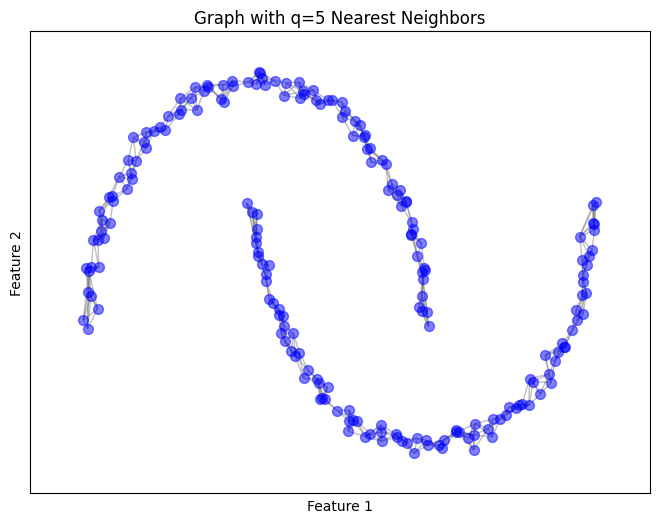

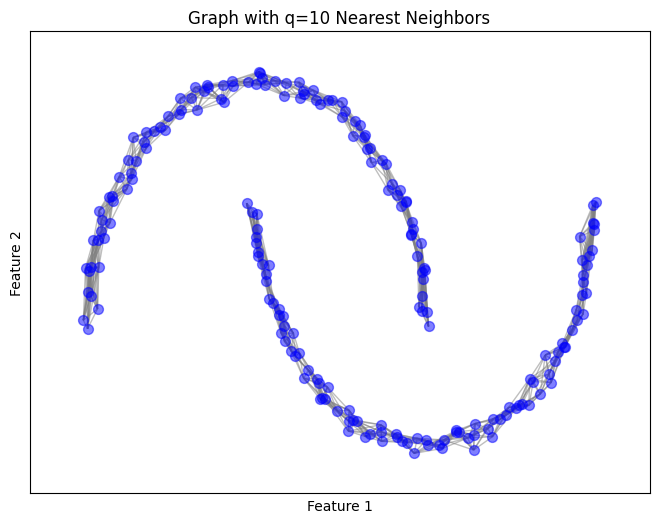

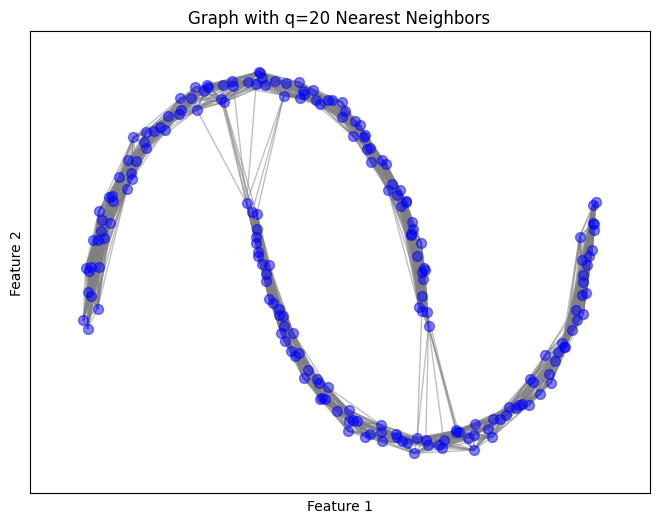

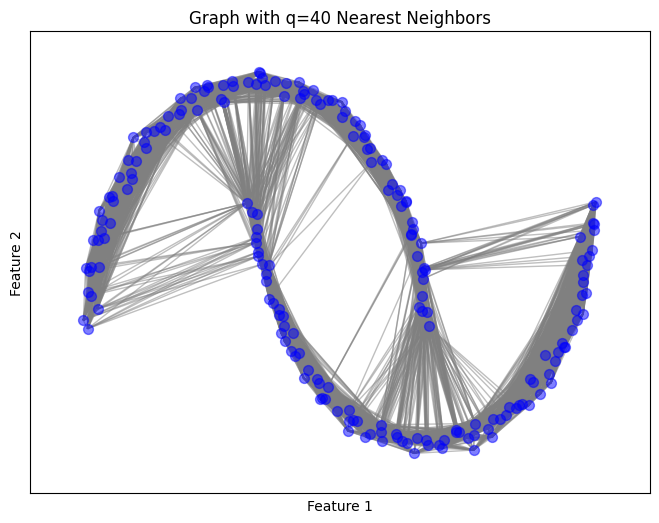

In [22]:
from sklearn.neighbors import kneighbors_graph

# Step 1: Load the dataset and extract only the first two columns (coordinates)
data = pd.read_csv("Question5.csv")
coordinates = data.iloc[:, :2].values  # Extract only (x, y) coordinates for the graph

# Define different values of q for q-nearest neighbors
q_values = [5, 10, 20, 40]

# Step 2 and 3: Generate adjacency matrices and plot graphs for each q
for q in q_values:
    # Generate the adjacency matrix with q-nearest neighbors
    adj_matrix = kneighbors_graph(coordinates, n_neighbors=q, include_self=False).toarray()
    
    # Create a graph from the adjacency matrix
    G = nx.from_numpy_array(adj_matrix)
    
    # Plot the graph with data points as positions
    plt.figure(figsize=(8, 6))
    pos = {i: (coordinates[i, 0], coordinates[i, 1]) for i in range(len(coordinates))}
    nx.draw_networkx(G, pos=pos, node_size=50, node_color='blue', with_labels=False, edge_color='gray', alpha=0.5)
    plt.title(f'Graph with q={q} Nearest Neighbors')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
'''
Choosing q=10 is likely the best choice here:
- It captures the local structure within each half circle while maintaining a balance with global connectivity.
- This value of q allows spectral clustering to detect and separate the two distinct half circles effectively without over-connecting them.
'''

#### b) Apply the spectral clustering to the obtain graphs with q=5,10,20,40. Plot and color all data points by the clustering results. Which q's will you choose? Are they same as your answer in a)? Why?

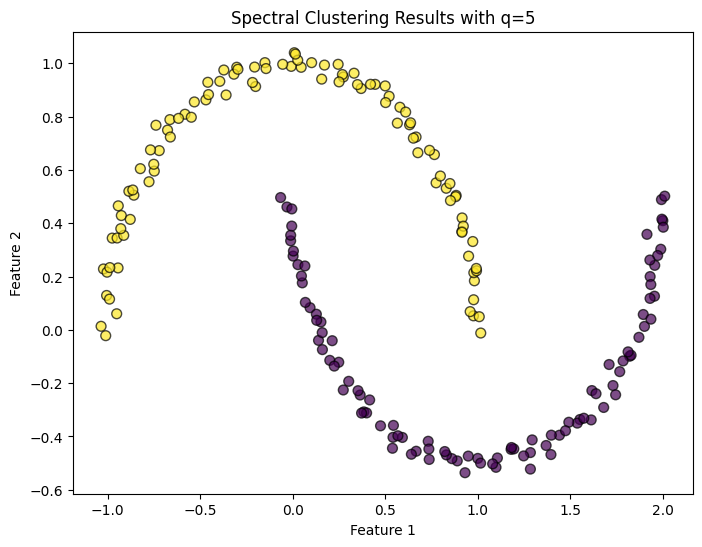

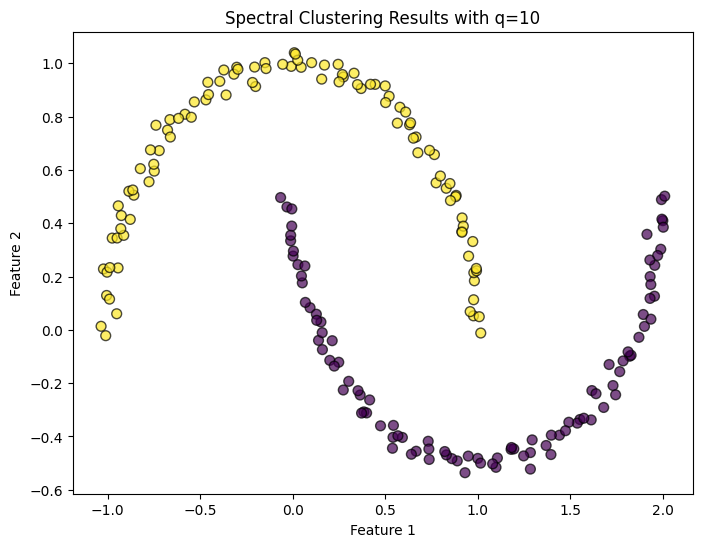

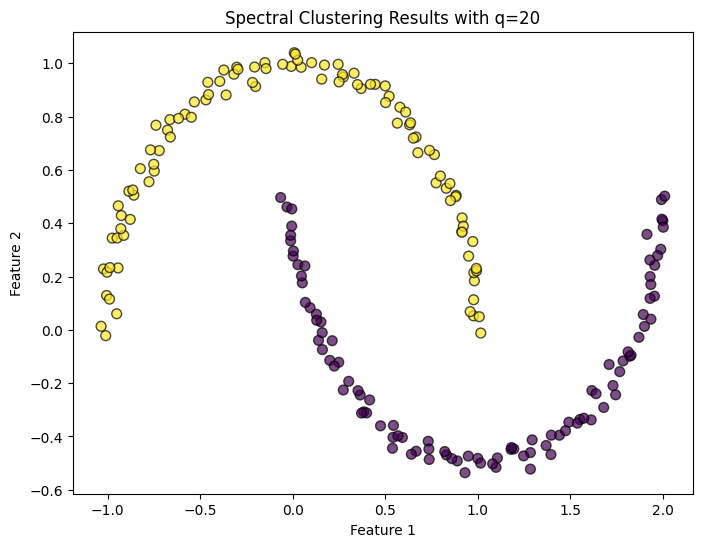

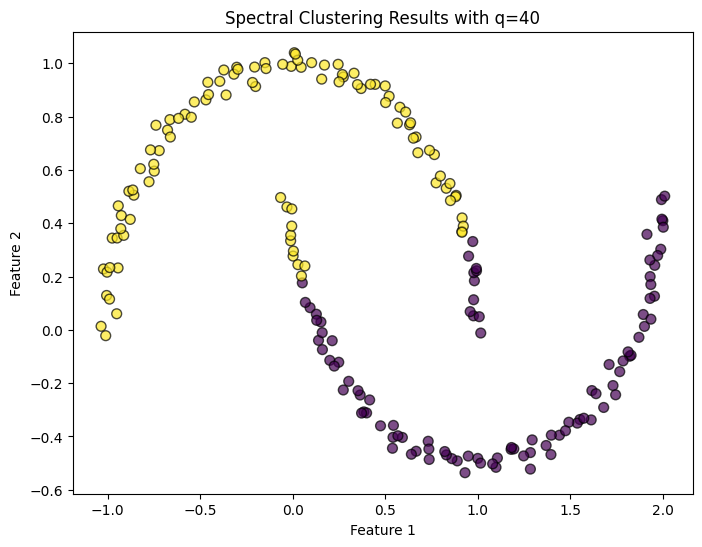

In [23]:
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import kneighbors_graph

# Step 2, 3, and 4: Generate adjacency matrices, apply spectral clustering, and plot results
for q in q_values:
    # Generate adjacency matrix with q-nearest neighbors
    adj_matrix = kneighbors_graph(coordinates, n_neighbors=q, include_self=False).toarray()
    
    # Apply spectral clustering
    n_clusters = 2  # We know there are two clusters (two half circles)
    spectral = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=0)
    labels = spectral.fit_predict(adj_matrix)
    
    # Plot the data points colored by cluster assignment
    plt.figure(figsize=(8, 6))
    plt.scatter(coordinates[:, 0], coordinates[:, 1], c=labels, cmap='viridis', marker='o', s=50, edgecolor='k', alpha=0.7)
    plt.title(f'Spectral Clustering Results with q={q}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
'''
q=10, as it provides a clear separation of the two clusters, aligning perfectly with the natural shape of the data. This choice allows spectral clustering to utilize both local and global structure without over-connecting points across clusters.
'''

#### c) Generate a weighted adjancency matrix using $h(z)=\exp(-\gamma*z^{2})$, and apply the spectral clustering to the obtained adjacency matrix. Plot and color all data points by the clustering results. Take $\gamma \in \{10^{0},10^1,\ldots,10^{4}\}$.

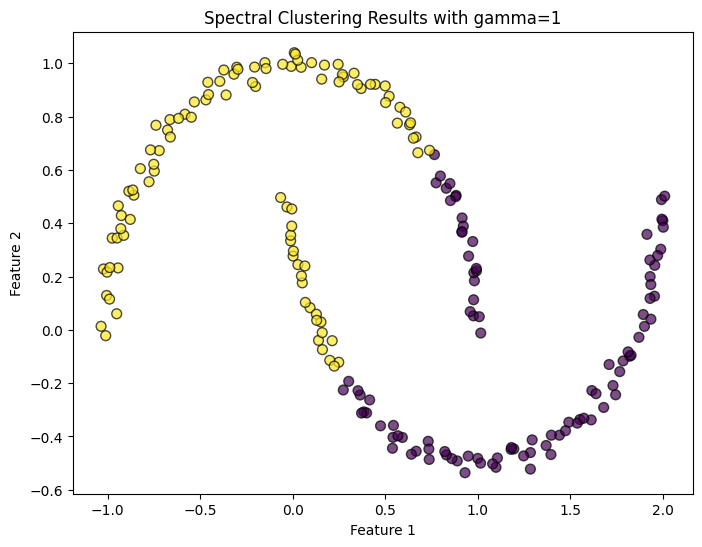

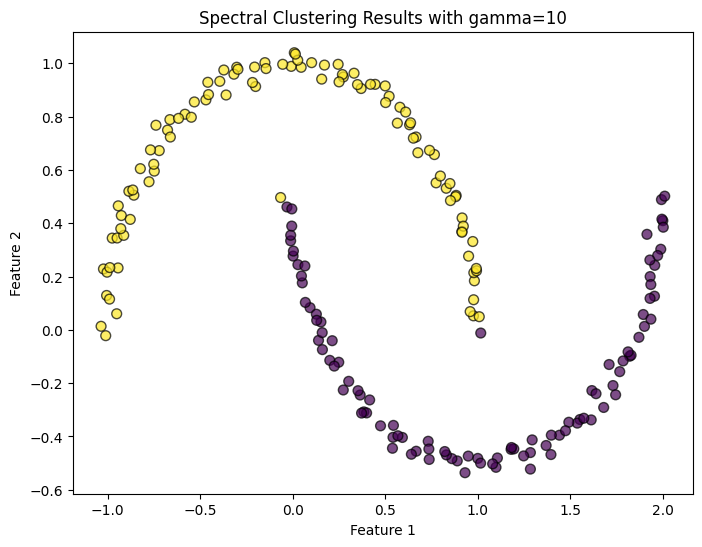

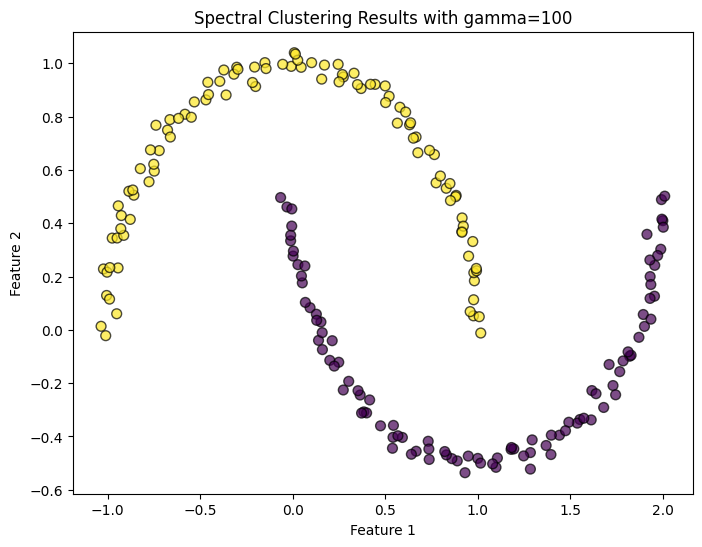

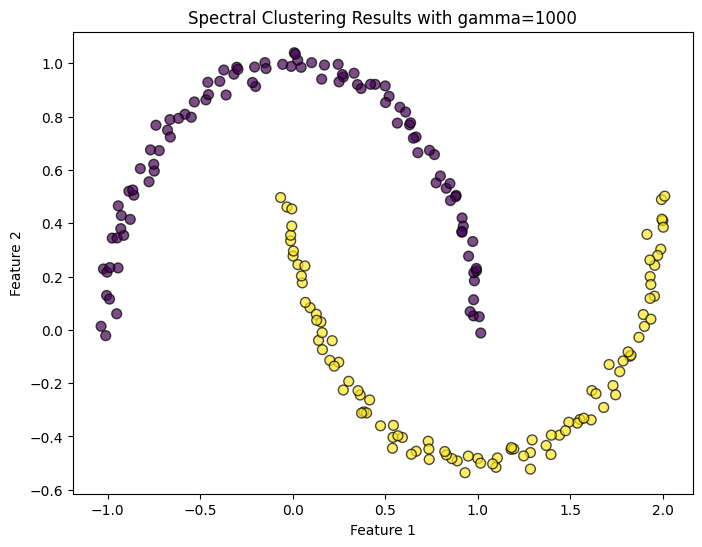

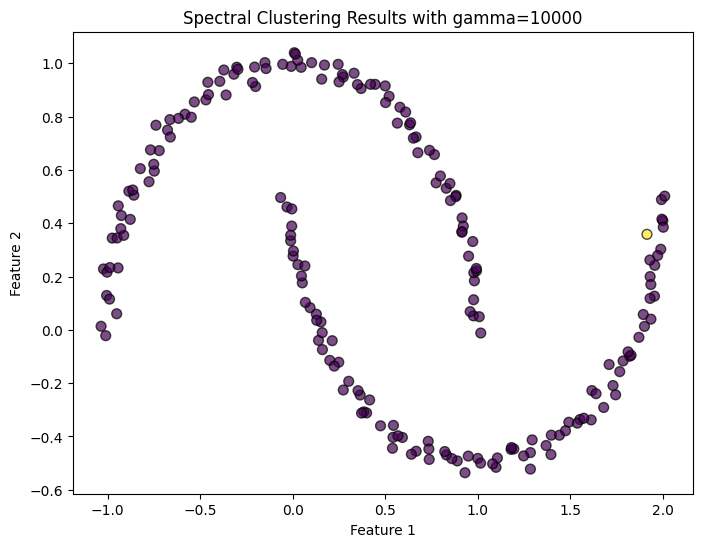

In [24]:
from sklearn.metrics import pairwise_distances
from sklearn.cluster import SpectralClustering
# Define gamma values for the weighting function
gamma_values = [10**i for i in range(5)]

# Step 2: Generate the distance matrix
dist_matrix = pairwise_distances(coordinates, metric='euclidean')

# Step 3: Apply the weighting function and spectral clustering for each gamma
for gamma in gamma_values:
    # Calculate the weighted adjacency matrix using h(z) = exp(-gamma * z^2)
    weighted_adj_matrix = np.exp(-gamma * dist_matrix**2)
    
    # Apply spectral clustering using the weighted adjacency matrix
    n_clusters = 2  # We know there are two clusters (two half circles)
    spectral = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=0)
    labels = spectral.fit_predict(weighted_adj_matrix)
    
    # Plot the data points colored by cluster assignment
    plt.figure(figsize=(8, 6))
    plt.scatter(coordinates[:, 0], coordinates[:, 1], c=labels, cmap='viridis', marker='o', s=50, edgecolor='k', alpha=0.7)
    plt.title(f'Spectral Clustering Results with gamma={gamma}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


#### d) Generate a weighted adjancency matrix using $h(z)=(z^{2}+1)^{-\gamma}$, and apply the spectral clustering to the obtained adjacency matrix. Plot and color all data points by the clustering results. Take $\gamma \in \{10^{0},10^1,\ldots,10^{4}\}$.

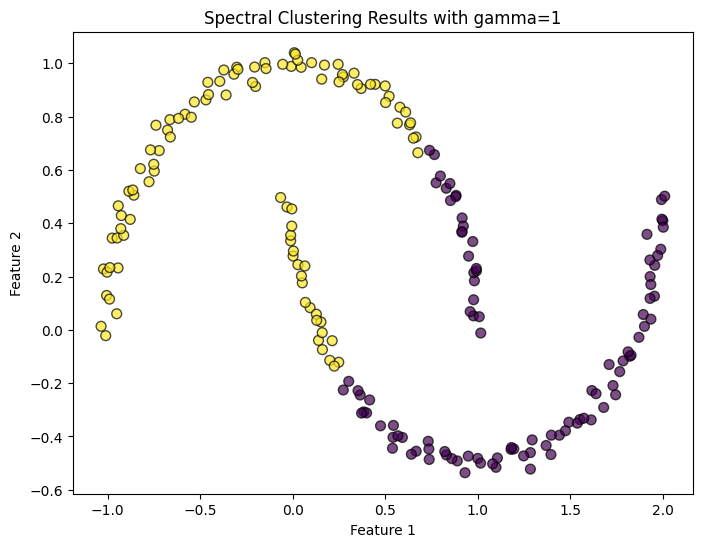

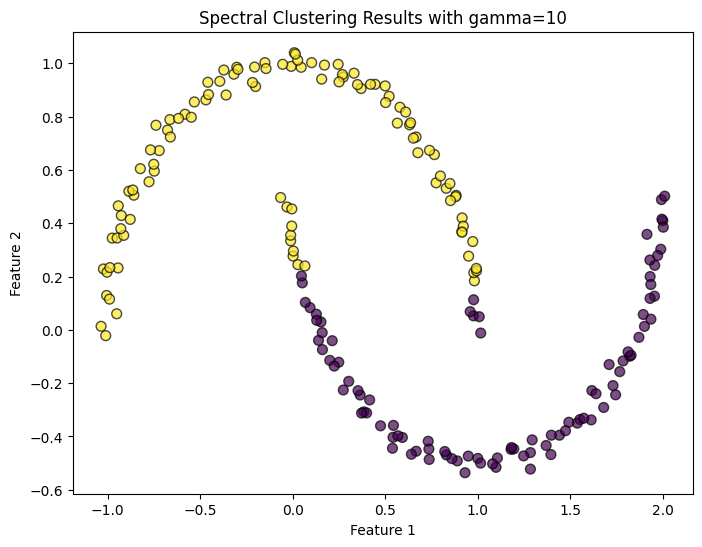

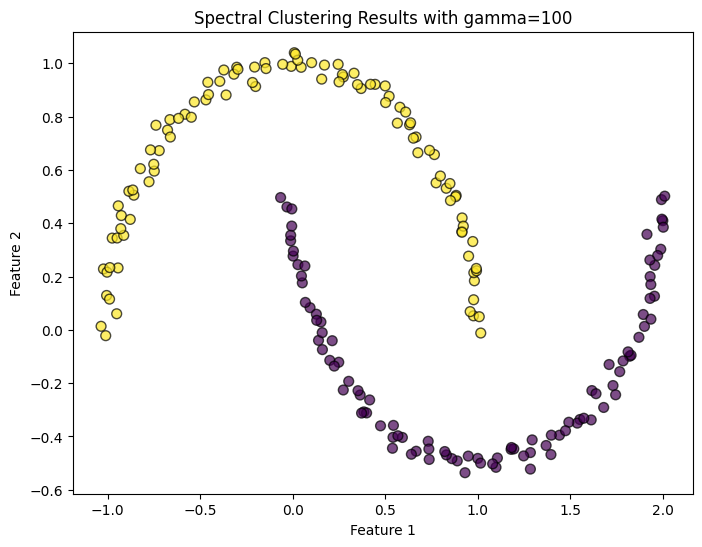

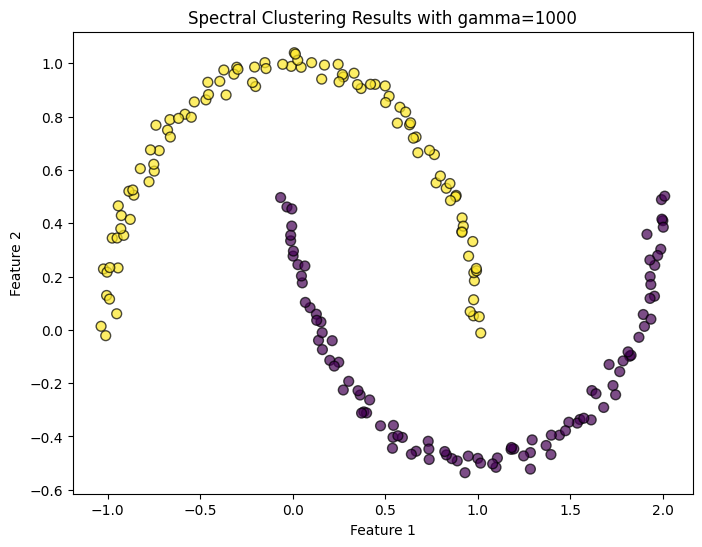

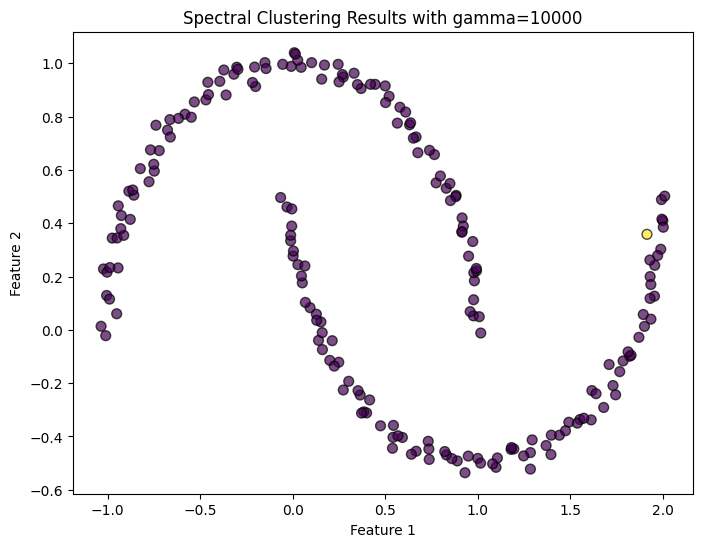

In [25]:
from sklearn.metrics import pairwise_distances
from sklearn.cluster import SpectralClustering
# Define gamma values for the weighting function
gamma_values = [10**i for i in range(5)]

# Step 2: Generate the distance matrix
dist_matrix = pairwise_distances(coordinates, metric='euclidean')

# Step 3: Apply the weighting function and spectral clustering for each gamma
for gamma in gamma_values:
    # Calculate the weighted adjacency matrix using h(z) = (z^2 + 1)^(-gamma)
    weighted_adj_matrix = (dist_matrix**2 + 1) ** -gamma
    
    # Apply spectral clustering using the weighted adjacency matrix
    n_clusters = 2  # We know there are two clusters (two half circles)
    spectral = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=0)
    labels = spectral.fit_predict(weighted_adj_matrix)
    
    # Plot the data points colored by cluster assignment
    plt.figure(figsize=(8, 6))
    plt.scatter(coordinates[:, 0], coordinates[:, 1], c=labels, cmap='viridis', marker='o', s=50, edgecolor='k', alpha=0.7)
    plt.title(f'Spectral Clustering Results with gamma={gamma}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
